# Problem 4

## Governing Equation
$$
\frac{\text{d}^2u}{\text{d}x^2} + 1 = 0 \qquad u(0) = u(L) = 0
$$
The parameters $f,EA$ and $L$ have already been substituted.

## Analytical Solution

$$
u(x) = \frac{1}{2}\left(-x^2 + x\right)
$$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import solve
%matplotlib inline

In [2]:
# loading configuration
execfile('../../matplotlibrc.py')

In [3]:
h = 0.1
L = 1.0
x = np.arange(0, L + h, h)
q = -1
N = len(x) - 2

In [4]:
x_exact = np.linspace(0, L, 500)  # Finer mesh
u_exact = 0.5*(-x_exact**2 + x_exact)

In [5]:
A = np.zeros((N, N))
i = range(N)
diag = [i, i]
upper = [i[:-1], i[1:]]
lower = upper[::-1] # Transpose-ish
A[diag] = 2/h
A[upper] = A[lower] = -1/h
A

array([[ 20., -10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-10.,  20., -10.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., -10.,  20., -10.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0., -10.,  20., -10.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., -10.,  20., -10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., -10.,  20., -10.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., -10.,  20., -10.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0., -10.,  20., -10.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0., -10.,  20.]])

In [6]:
b = h*np.ones(N)
b

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

In [7]:
c = np.zeros_like(x)
c[1:-1] = solve(A, b)

In [8]:
c

array([ 0.   ,  0.045,  0.08 ,  0.105,  0.12 ,  0.125,  0.12 ,  0.105,
        0.08 ,  0.045,  0.   ])

## Post-Processing

We merely have the plot the coefficients $c_i$!

The reason is the following:
$$
\phi_i(x_j) = \delta_{ij}
$$
it follows that:
$$
u(x_j) = \sum_{i=1}^N \phi_i(x_j) c_i = \sum_{i=1}^N \delta_{ij} c_i = c_i
$$
Since we're using linear basis functions, it is completely fine to let the plotting tool merely draw lines between the values $c_i$. 

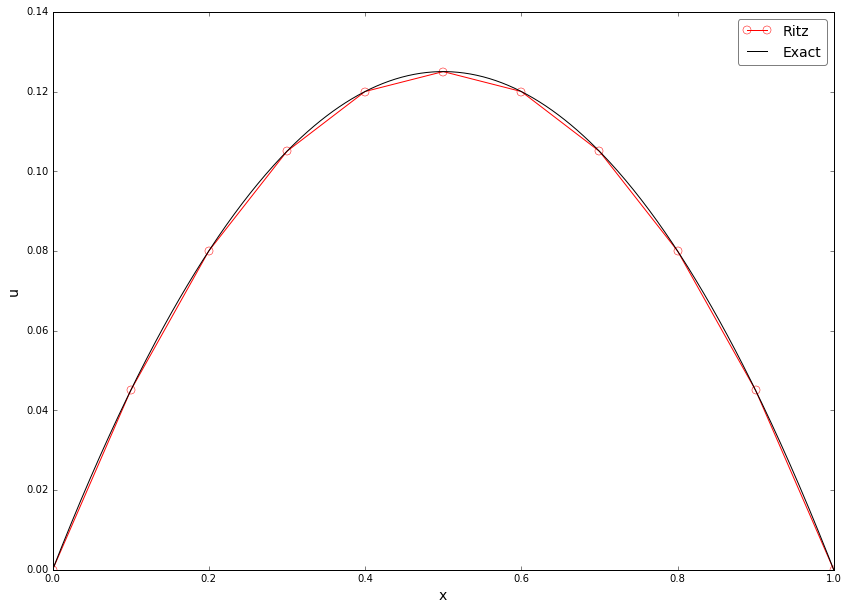

In [9]:
fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(x, c, 'r-o', label='Ritz', mec='r', mfc='none', ms=8)
ax.plot(x_exact, u_exact, 'k', label='Exact')
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
plt.show()